<a href="https://colab.research.google.com/github/Jeevan1611/datasette/blob/main/netflix_titles.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
from google.colab import files
uploaded = files.upload()
import pandas as pd

# Load the dataset
df = pd.read_csv('netflix_titles.csv')
df.head()


Saving netflix_titles.csv to netflix_titles.csv


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [10]:
import pandas as pd

# Load the uploaded dataset
# The file uploaded via files.upload() is available in the current directory
df = pd.read_csv('netflix_titles.csv')
df.head()


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [11]:
# Overview
df.info()
df.isnull().sum()

# Fill missing values
df['description'] = df['description'].fillna('')
df['country'] = df['country'].fillna('Unknown')
df['rating'] = df['rating'].fillna('Not Rated')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


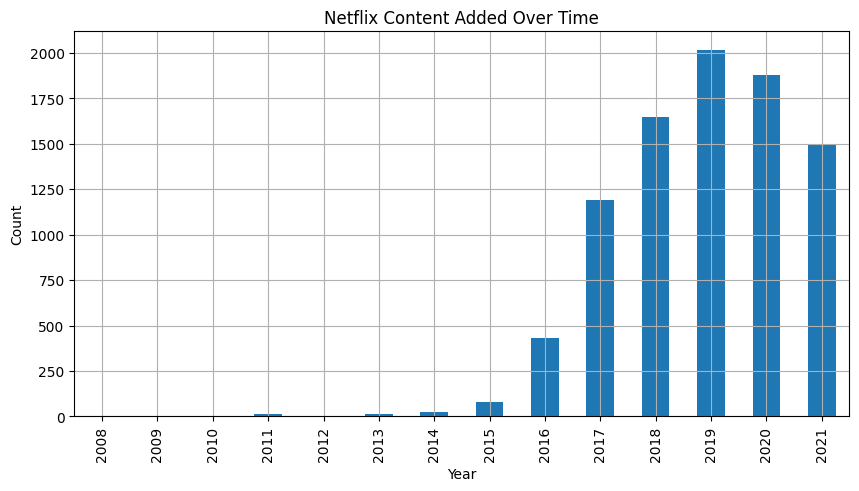

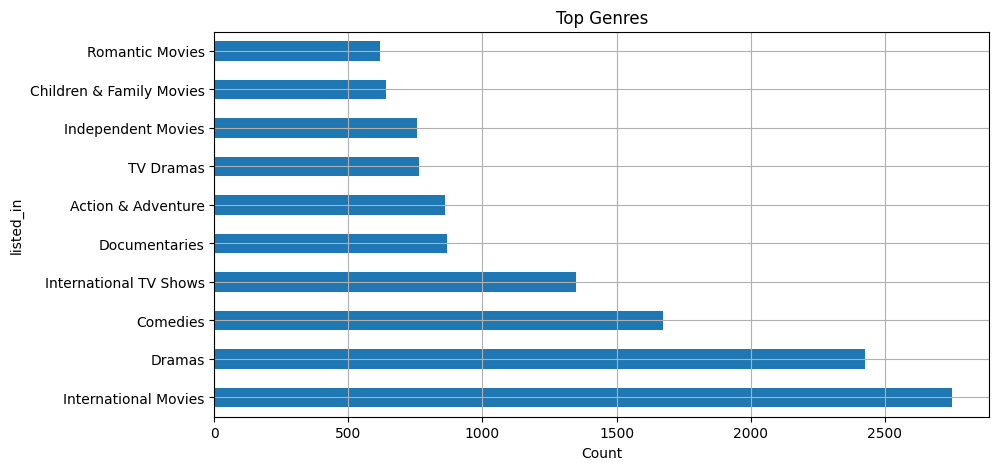

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd # Ensure pandas is imported

# Date conversion
# Use format='mixed' to handle potential inconsistencies in date formats
df['date_added'] = pd.to_datetime(df['date_added'], format='mixed', errors='coerce')
# Handle potential NaT values that might arise from conversion errors
df.dropna(subset=['date_added'], inplace=True)

df['year_added'] = df['date_added'].dt.year

# Netflix additions over the years
plt.figure(figsize=(10, 5))
df['year_added'].value_counts().sort_index().plot(kind='bar', title='Netflix Content Added Over Time')
plt.xlabel("Year")
plt.ylabel("Count")
plt.grid(True)
plt.show()

# Top genres
plt.figure(figsize=(10, 5))
df['listed_in'].str.split(', ').explode().value_counts().head(10).plot(kind='barh', title='Top Genres')
plt.xlabel("Count")
plt.grid(True)
plt.show()


In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel

# TF-IDF on description
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(df['description'])

# Compute cosine similarity
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

# Map movie titles to index
indices = pd.Series(df.index, index=df['title']).drop_duplicates()


In [15]:
def get_recommendations(title, cosine_sim=cosine_sim):
    if title not in indices:
        return "❌ Movie not found. Try another title."

    idx = indices[title]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)[1:6]
    movie_indices = [i[0] for i in sim_scores]
    return df['title'].iloc[movie_indices].tolist()


In [16]:
get_recommendations('Breaking Bad')  # Replace with any title from the dataset


['The Book of Sun',
 'Alice Junior',
 'Iron Ladies',
 'Dismissed',
 'Alexa & Katie']

<ipython-input-17-ecbf6bfb8006>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.values, y=top_countries.index, palette='Set2')


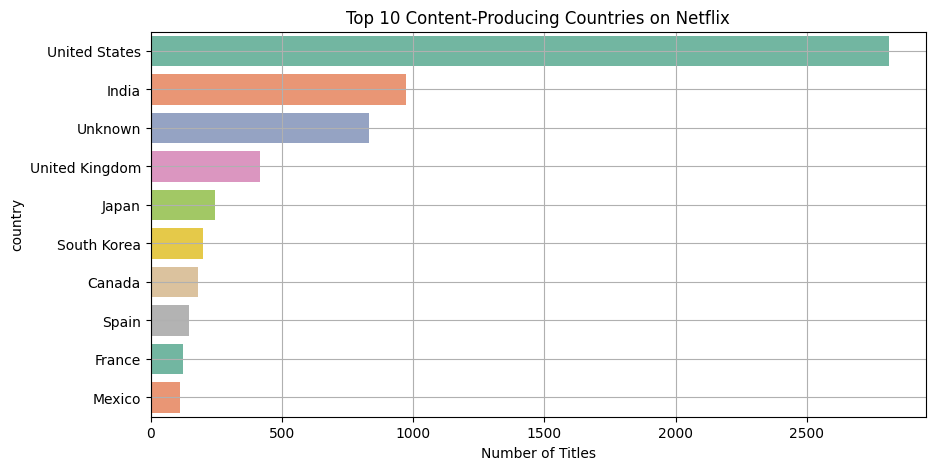

In [17]:
top_countries = df['country'].value_counts().head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=top_countries.values, y=top_countries.index, palette='Set2')
plt.title("Top 10 Content-Producing Countries on Netflix")
plt.xlabel("Number of Titles")
plt.grid(True)
plt.show()


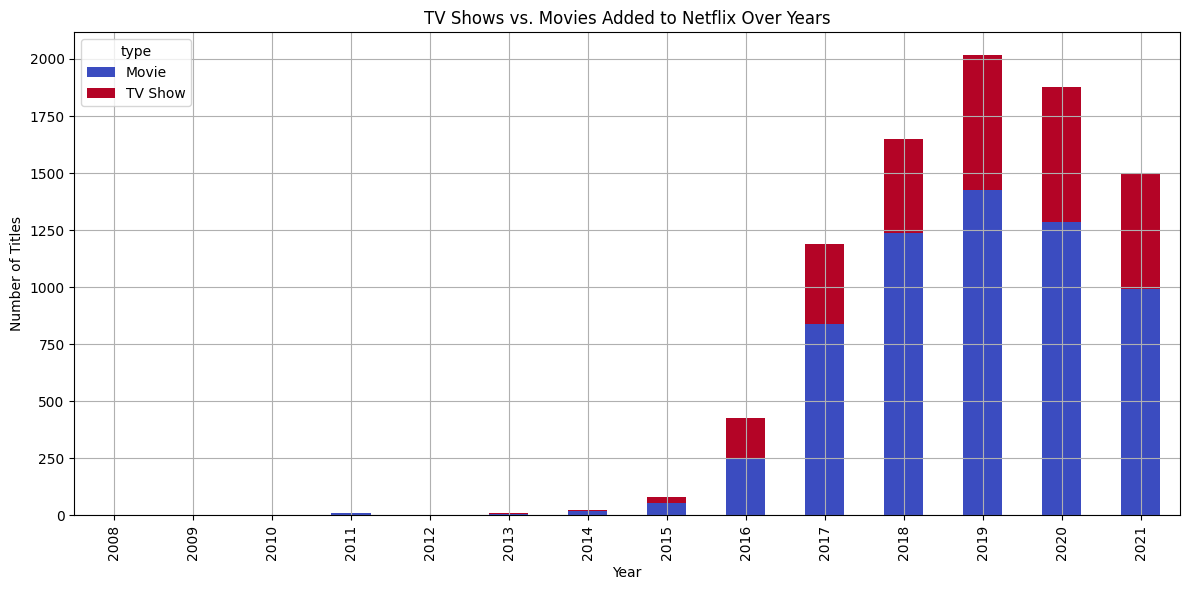

In [18]:
content_type_by_year = df.groupby(['year_added', 'type']).size().unstack().fillna(0)

content_type_by_year.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='coolwarm')
plt.title("TV Shows vs. Movies Added to Netflix Over Years")
plt.xlabel("Year")
plt.ylabel("Number of Titles")
plt.grid(True)
plt.tight_layout()
plt.show()


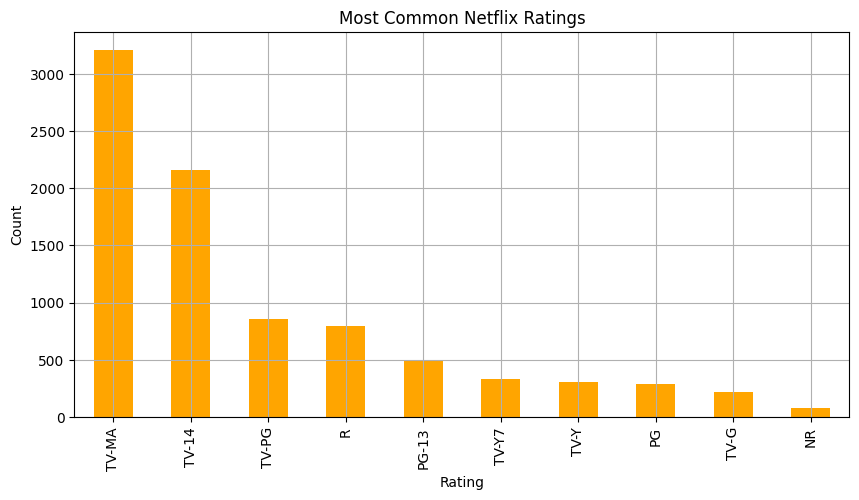

In [19]:
plt.figure(figsize=(10,5))
df['rating'].value_counts().head(10).plot(kind='bar', color='orange')
plt.title("Most Common Netflix Ratings")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.grid(True)
plt.show()


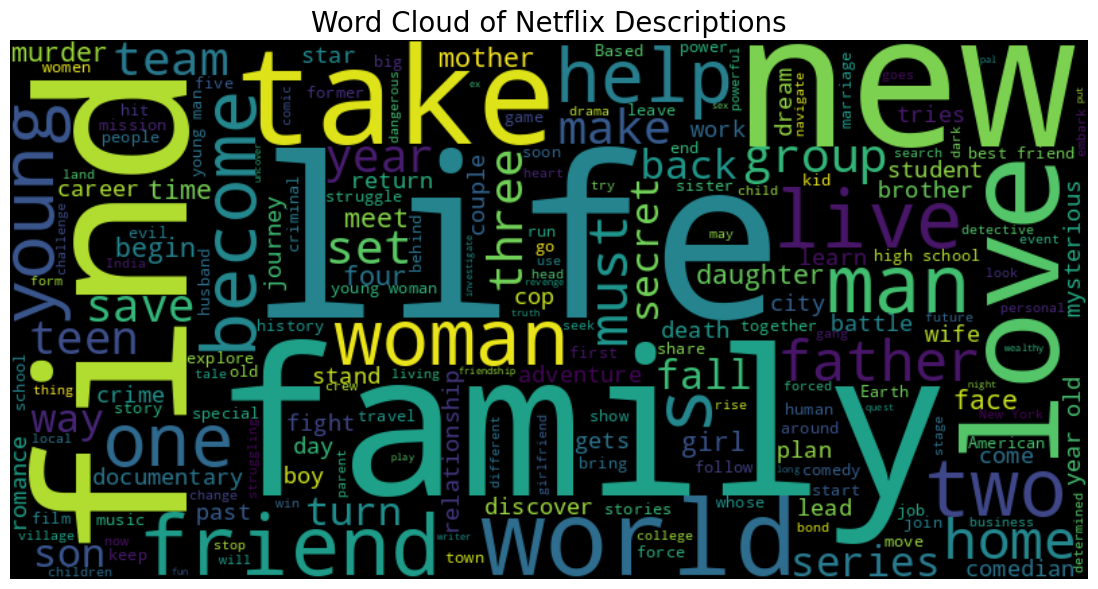

In [20]:
from wordcloud import WordCloud

text = ' '.join(df['description'])
wordcloud = WordCloud(width=800, height=400, background_color='black').generate(text)

plt.figure(figsize=(15, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of Netflix Descriptions", fontsize=20)
plt.show()


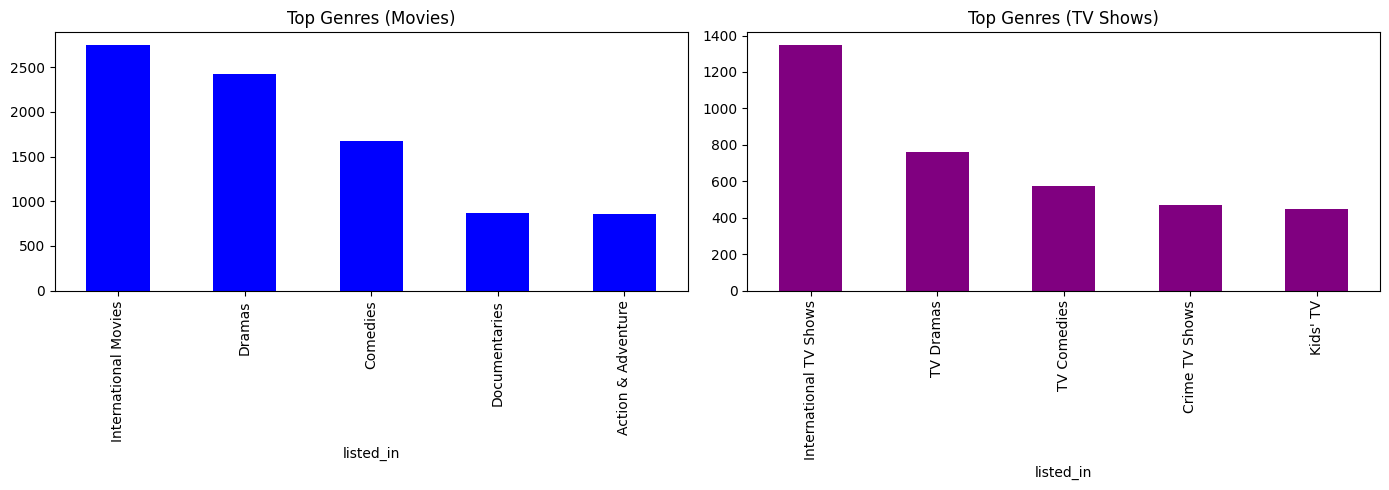

In [21]:
# Explode genre column
df_exploded = df.assign(listed_in=df['listed_in'].str.split(', ')).explode('listed_in')

# Top 5 genres for Movies
movies = df_exploded[df_exploded['type'] == 'Movie']
top_movie_genres = movies['listed_in'].value_counts().head(5)

# Top 5 genres for TV Shows
shows = df_exploded[df_exploded['type'] == 'TV Show']
top_show_genres = shows['listed_in'].value_counts().head(5)

# Plot
fig, axs = plt.subplots(1, 2, figsize=(14, 5))
top_movie_genres.plot(kind='bar', ax=axs[0], color='blue', title='Top Genres (Movies)')
top_show_genres.plot(kind='bar', ax=axs[1], color='purple', title='Top Genres (TV Shows)')
plt.tight_layout()
plt.show()


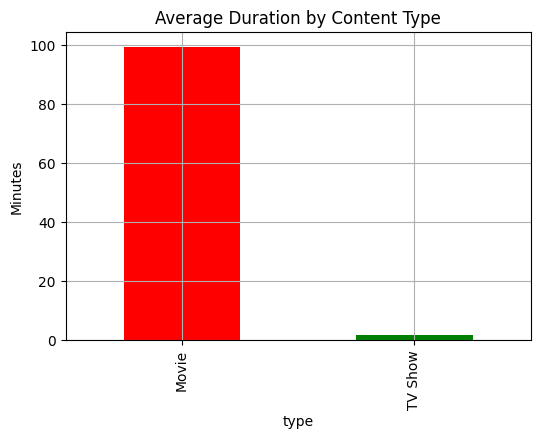

In [22]:
# Clean duration values
df['duration_clean'] = df['duration'].str.extract('(\d+)').astype(float)

# Average duration by type
avg_duration = df.groupby('type')['duration_clean'].mean()

plt.figure(figsize=(6, 4))
avg_duration.plot(kind='bar', color=['red', 'green'])
plt.title("Average Duration by Content Type")
plt.ylabel("Minutes")
plt.grid(True)
plt.show()
